In [3]:
pip install requests beautifulsoup4 requests-html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=5853875fd830da64cf9398d40f4c4bf4b58b356c4b31e0f6bbbc03141d08221a
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [15]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import matplotlib.pyplot as plt
import nltk.data
from requests_html import HTMLSession


In this file our goal is scarping data from the Komono website, a Belgian brand that primarily sells sunglasses and watches on its online platform. Since the product categories are spread across two different web pages, the code retrieves the necessary information from both URLs to gather comprehensive data on the available products.

In [125]:
import requests
from bs4 import BeautifulSoup

url = "https://shop.komono.com/collections/sunglasses"
response = requests.get(url)


soup = BeautifulSoup(response.content, "html.parser")

model = []
promotion_price = []
regular_price = []

category = soup.find("h1", class_="u-hidden").text.strip()
infos = soup.find_all("div", class_="product-teaser__info")

for info in infos:
    model.append(info.find("div", class_="product-title-price__title").text.strip())
    promotion_price.append(info.find("span", class_="money").text.strip())
    regular_prices = info.find_all("s", attrs={"data-compare-price": True})
    regular_price.append(regular_prices[0].find("span", class_="money").get_text(strip=True) if regular_prices else 0)

# Ensure the lists have the same length
length = len(model)
promotion_price = promotion_price[:length]
regular_price = regular_price[:length]

data = {
    "category": [category] * length,
    "model_name": model,
    "promotion_price": promotion_price,
    "regular_price": regular_price
}

df_sunglasses = pd.DataFrame(data)
df_sunglasses.loc[df_sunglasses['regular_price'] == 0, ['regular_price', 'promotion_price']] = df_sunglasses.loc[df_sunglasses['regular_price'] == 0, ['promotion_price', 'regular_price']].values
print(df_sunglasses)

       category               model_name promotion_price regular_price
0    Sunglasses             Ana Tortoise               0        €59.00
1    Sunglasses                 Ana Fern               0        €59.00
2    Sunglasses            Ana Red Sands               0        €59.00
3    Sunglasses                  Ana Ink          €29.50        €59.00
4    Sunglasses                Ana Blush               0        €59.00
..          ...                      ...             ...           ...
365  Sunglasses               Alexa Mint               0       €129.00
366  Sunglasses              Alexa Black               0       €129.00
367  Sunglasses          Jude Gold Black               0       €129.00
368  Sunglasses           Jude Rose Gold               0       €129.00
369  Sunglasses  Jude Wing Silver Tropic               0       €139.00

[370 rows x 4 columns]


In [144]:
url = "https://shop.komono.com/collections/watches"
response = requests.get(url)


soup = BeautifulSoup(response.content, "html.parser")

model = []
promotion_price = []
regular_price = []

category = soup.find("h1", class_="u-hidden").text.strip()
infos = soup.find_all("div", class_="product-teaser__info")

for info in infos:
    model.append(info.find("div", class_="product-title-price__title").text.strip())
    promotion_price.append(info.find("span", class_="money").text.strip())
    regular_prices = info.find_all("s", attrs={"data-compare-price": True})
    regular_price.append(regular_prices[0].find("span", class_="money").get_text(strip=True) if regular_prices else 0)

# Ensure the lists have the same length
length = len(model)
promotion_price = promotion_price[:length]
regular_price = regular_price[:length]

data = {
    "category": [category] * length,
    "model_name": model,
    "promotion_price": promotion_price,
    "regular_price": regular_price
}

df_watches = pd.DataFrame(data)
df_watches.loc[df_watches['regular_price'] == 0, ['regular_price', 'promotion_price']] = df_watches.loc[df_watches['regular_price'] == 0, ['promotion_price', 'regular_price']].values
print(df_watches)

    category                           model_name promotion_price  \
0    Watches  Moneypenny Royale Silver Light Blue               0   
1    Watches         Moneypenny Royale Gold White               0   
2    Watches               Moneypenny Royale Gold               0   
3    Watches          Moneypenny Royale Rose Gold               0   
4    Watches             Moneypenny Royale Silver               0   
..       ...                                  ...             ...   
152  Watches              Ray Shade Leather Black               0   
153  Watches                 Ray Shade Nato Green               0   
154  Watches                 Ray Shade Nato Black               0   
155  Watches        Ray Venture Nato Silver Black               0   
156  Watches        Ray Venture Nato Silver Green               0   

    regular_price  
0          €79.00  
1          €79.00  
2          €79.00  
3          €79.00  
4          €79.00  
..            ...  
152        €99.00  
153        

The code below appends watches dataframe to sunglasses one , so we have all data in "df" dataframe.

In [145]:
df=df_sunglasses.append(df_watches)
print(df)

       category                     model_name promotion_price regular_price
0    Sunglasses                   Ana Tortoise               0        €59.00
1    Sunglasses                       Ana Fern               0        €59.00
2    Sunglasses                  Ana Red Sands               0        €59.00
3    Sunglasses                        Ana Ink          €29.50        €59.00
4    Sunglasses                      Ana Blush               0        €59.00
..          ...                            ...             ...           ...
152     Watches        Ray Shade Leather Black               0        €99.00
153     Watches           Ray Shade Nato Green               0        €99.00
154     Watches           Ray Shade Nato Black               0        €99.00
155     Watches  Ray Venture Nato Silver Black               0        €99.00
156     Watches  Ray Venture Nato Silver Green               0        €99.00

[527 rows x 4 columns]


<ipython-input-145-6c5fb0980b29>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_sunglasses.append(df_watches)


Below codes remove'€' symbol from 'regular_price' and 'promotion_price' columns and convert them to float data type.

In [146]:
df['regular_price'] =df['regular_price'].str.replace('€', '')
df['promotion_price'] = df['promotion_price'].str.replace('€', '')


In [147]:
df['promotion_price'] = pd.to_numeric(df['promotion_price'], errors='coerce')
df['regular_price'] = pd.to_numeric(df['regular_price'], errors='coerce')
print(df)


       category                     model_name  promotion_price  regular_price
0    Sunglasses                   Ana Tortoise              NaN           59.0
1    Sunglasses                       Ana Fern              NaN           59.0
2    Sunglasses                  Ana Red Sands              NaN           59.0
3    Sunglasses                        Ana Ink             29.5           59.0
4    Sunglasses                      Ana Blush              NaN           59.0
..          ...                            ...              ...            ...
152     Watches        Ray Shade Leather Black              NaN           99.0
153     Watches           Ray Shade Nato Green              NaN           99.0
154     Watches           Ray Shade Nato Black              NaN           99.0
155     Watches  Ray Venture Nato Silver Black              NaN           99.0
156     Watches  Ray Venture Nato Silver Green              NaN           99.0

[527 rows x 4 columns]


Now we add a column named "status" showing which products are promoted,and a percentage column to calculate the percentage of promotion on each product.

In [148]:
percentage = []
status = []

for index, row in df.iterrows():
    regular_price = row['regular_price']
    promotion_price = row['promotion_price']
    percentage.append((regular_price - promotion_price) / regular_price * 100)
    if promotion_price>0:
        status.append('promo')
    else:
        status.append('regular')

df['percentage'] = percentage
df['status'] = status
print(df)




       category                     model_name  promotion_price  \
0    Sunglasses                   Ana Tortoise              NaN   
1    Sunglasses                       Ana Fern              NaN   
2    Sunglasses                  Ana Red Sands              NaN   
3    Sunglasses                        Ana Ink             29.5   
4    Sunglasses                      Ana Blush              NaN   
..          ...                            ...              ...   
152     Watches        Ray Shade Leather Black              NaN   
153     Watches           Ray Shade Nato Green              NaN   
154     Watches           Ray Shade Nato Black              NaN   
155     Watches  Ray Venture Nato Silver Black              NaN   
156     Watches  Ray Venture Nato Silver Green              NaN   

     regular_price  percentage   status  
0             59.0         NaN  regular  
1             59.0         NaN  regular  
2             59.0         NaN  regular  
3             59.0        5

We have completed all the necessary steps to prepare the data, bringing us to a point where we can now analyze the information from the Komono website. With the data ready, we can generate insightful charts and tables that provide a clear and understandable representation of the findings.
Below code creates a bar plot showing the number of products in each categories.

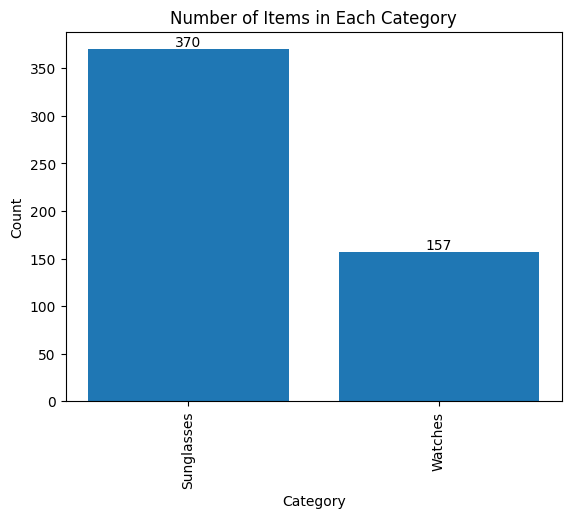

In [150]:
category_counts = df['category'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Items in Each Category')
plt.xticks(rotation=90)

# Add count values to the end of each bar
for i, count in enumerate(category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()



To gain deeper insights into the data, it is essential to delve into more details. For instance, by calculating the average price for each category, we can determine which category tends to have higher prices.
so below code creates a bar chart which shows averege price for both categories.

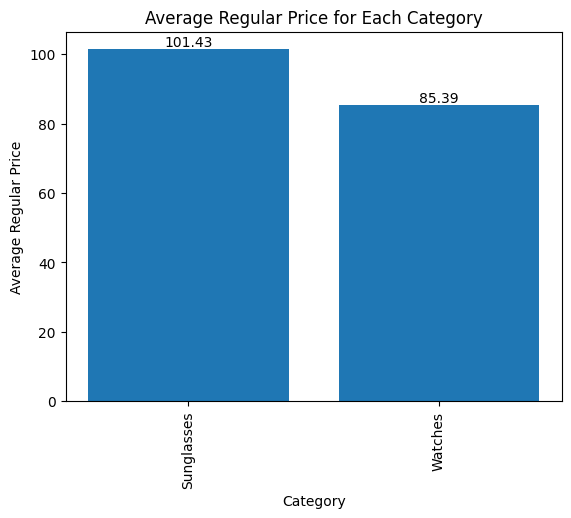

In [136]:
avg_regular_price = df.groupby('category')['regular_price'].mean()

plt.bar(avg_regular_price.index, avg_regular_price.values)
plt.xlabel('Category')
plt.ylabel('Average Regular Price')
plt.title('Average Regular Price for Each Category')
plt.xticks(rotation=90)

for i, value in enumerate(avg_regular_price.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


Based on the two charts presented earlier, it appears that sunglasses hold the largest share in their business. this might also mean these two categories are dramtically different, and therfore, company's promotional strategies should be different.That's the reason why we dig even deeper to analyze each category seprately.
In the code below we represent share of promotion in each category based on the number of products.

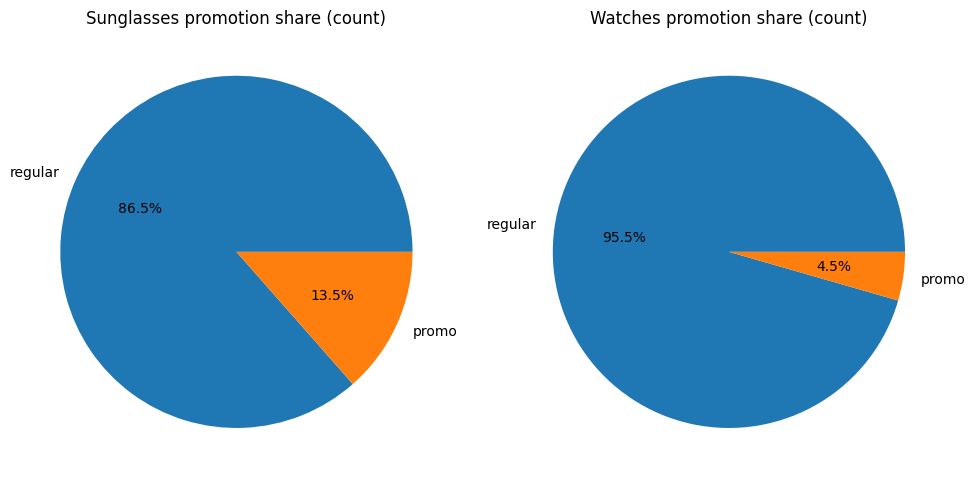

In [153]:
grouped_df = df.groupby('category')

fig, axes = plt.subplots(nrows=1, ncols=len(grouped_df), figsize=(10, 5))


for i, (category, group) in enumerate(grouped_df):
    status_counts = group['status'].value_counts()

    labels = status_counts.index
    sizes = status_counts.values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axes[i].set_title(f'{category} promotion share (count)')

plt.tight_layout()
plt.show()


 In the code below we represent share of promotion in each category based on the total value of each category.

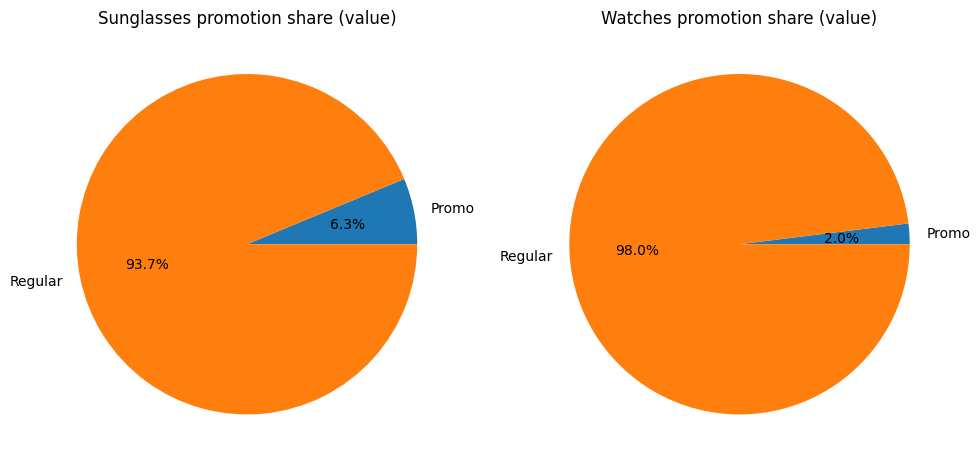

In [152]:
grouped_df = df.groupby('category')

# Calculate the sum of promotion_price and regular_price for each group
sum_promotion_price = grouped_df['promotion_price'].sum()
sum_regular_price = grouped_df['regular_price'].sum()

fig, axes = plt.subplots(nrows=1, ncols=len(grouped_df), figsize=(10, 5))

for i, (category, _) in enumerate(grouped_df):
    share = sum_promotion_price[category] / sum_regular_price[category]

    labels = ['Promo', 'Regular']
    sizes = [share, 1 - share]
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axes[i].set_title(f'{category} promotion share (value)')

plt.tight_layout()
plt.show()


As expected, Komono has mainly focused on promoting sunglasses, as they are the core of their business.

To compare price levels and examine the potential relationship between price levels and promotional strategies, the following code is used. It calculates the share of promoted items within different price points

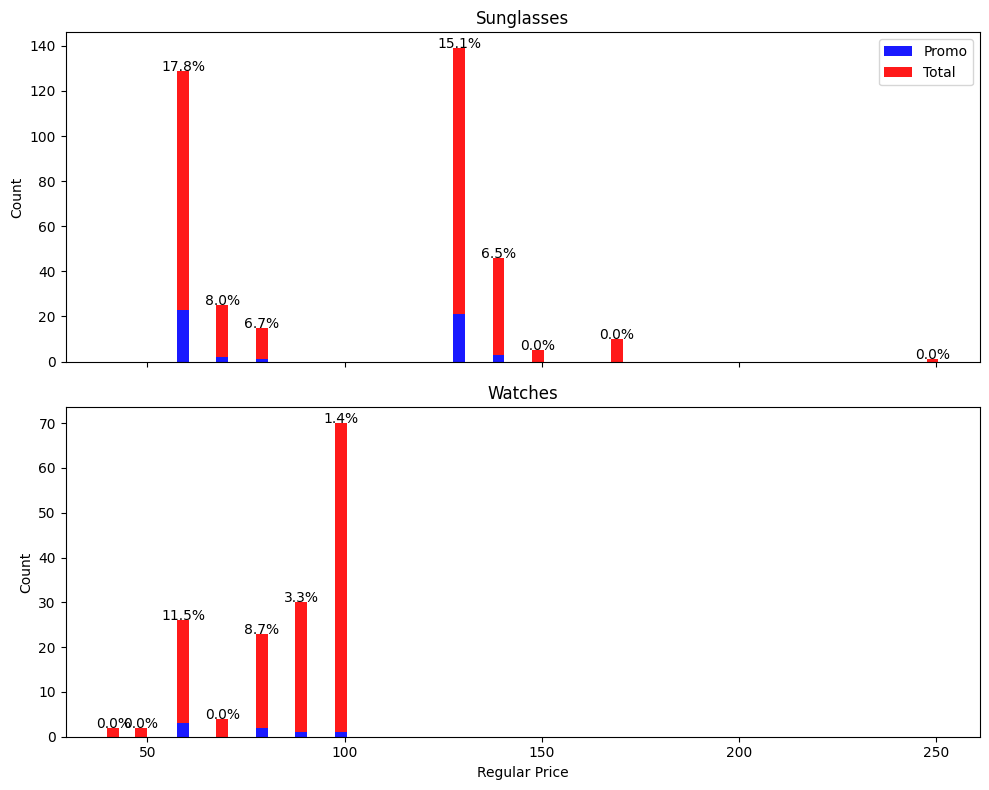

In [154]:
grouped_df = df.groupby(['category', 'regular_price']).size().reset_index(name='total_count')

# Filter the DataFrame for rows where 'status' equals 'promo'
promo_df = df[df['status'] == 'promo']
promo_grouped_df = promo_df.groupby(['category', 'regular_price']).size().reset_index(name='promo_count')

merged_df = pd.merge(grouped_df, promo_grouped_df, on=['category', 'regular_price'], how='left')

# Fill NaN values in 'promo_count' with 0
merged_df['promo_count'].fillna(0, inplace=True)

# Calculate the percentage of 'promo_count' out of 'total_count'
merged_df['percentage'] = merged_df['promo_count'] / merged_df['total_count'] * 100

categories = df['category'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

for i, category in enumerate(categories):
    category_df = merged_df[merged_df['category'] == category]

    ax = axes[i]
    ax.bar(category_df['regular_price'], category_df['promo_count'], width=3, label='Promo', color='blue', alpha=0.9)
    ax.bar(category_df['regular_price'], category_df['total_count'] - category_df['promo_count'],
           bottom=category_df['promo_count'], width=3, label='Total', color='red', alpha=0.9)
    ax.set_title(category)
    ax.set_ylabel('Count')

    # Add text annotations for the percentage of 'promo' to 'total'
    for x, promo_count, total_count in zip(category_df['regular_price'], category_df['promo_count'], category_df['total_count']):
        percentage = promo_count / total_count * 100
        ax.text(x, total_count, f'{percentage:.1f}%', ha='center')

axes[-1].set_xlabel('Regular Price')
axes[0].legend()
plt.tight_layout()
plt.show()


Although there doesn't seem to be a direct relationship between price and promotional activities, several insightful observations can be made for each category.

Sunglasses:

1.There are no promotions on the most expensive sunglasses (price > 149). This aligns with expectations, as these items may cater to a niche market, and customers who seek such high-end sunglasses are likely to purchase them regardless of promotional offers.
2.It appears that the most popular sunglasses are priced at two main price points (129 and 59). Consequently, it is logical that the largest shares of promotions are allocated to these price points.

Watches:

1.Clearly, higher-priced items have lower promotional activities.
2.It is noticeable that Komono does not offer any promotions on items priced below 50 euros. This decision could be influenced by the lower profit margin on these items, making it unfeasible for Komono to provide promotions while still maintaining profitability.
3.The largest share of promotions belongs to watches priced at 59 euros, which falls within the mid-range price category. This observation suggests that Komono has strategically allocated promotions to attract customers to this price point, potentially due to its appeal and profitability.